<a href="https://colab.research.google.com/github/nat13lla/Capstone/blob/main/datamanipulation/TrainTest_Split_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tools
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Read in the dataframe from github
df = pd.read_csv("https://raw.githubusercontent.com/nat13lla/Capstone/main/data_files/ordered_data.csv")

# Train test Split

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,results_id,race_year,round,race_name,race_id,date_of_race,time_of_race,circuit_name,circuit_id,location,country,lat,lng,drivers_id,driverId,givenName,familyName,code,perm_number,driver_nationality,dob,constructors_id,constructorId,constructor_name,constructor_nationality,start_position,end_position,points_gained,race_status,laps_done,race_millis,race_time,fl_av_speed,fl_time,fl_lap_no,fl_rank,points_achieved
0,1,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,9,leclerc,Charles,Leclerc,LEC,16,Monegasque,1997-10-16,5,ferrari,Ferrari,Italian,1,1,26,Finished,57,5853584.0,1:37:33.584,206.018,1:34.570,51.0,1.0,1
1,2,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,16,sainz,Carlos,Sainz,SAI,55,Spanish,1994-09-01,5,ferrari,Ferrari,Italian,3,2,18,Finished,57,5859182.0,+5.598,203.501,1:35.740,52.0,3.0,1
2,3,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,6,hamilton,Lewis,Hamilton,HAM,44,British,1985-01-07,8,mercedes,Mercedes,German,5,3,15,Finished,57,5863259.0,+9.675,202.469,1:36.228,53.0,5.0,1
3,4,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,15,russell,George,Russell,RUS,63,British,1998-02-15,8,mercedes,Mercedes,German,9,4,12,Finished,57,5864795.0,+11.211,202.313,1:36.302,56.0,6.0,1
4,5,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,10,kevin_magnussen,Kevin,Magnussen,MAG,20,Danish,1992-10-05,6,haas,Haas F1 Team,American,7,5,10,Finished,57,5868338.0,+14.754,201.641,1:36.623,53.0,8.0,1


In [4]:
feature_cols = df.columns
feature_cols = list(feature_cols)
feature_cols.remove("points_achieved") # end_position or points_gained

In [5]:
X = df[feature_cols]
X = sm.add_constant(X)
y = df["points_achieved"]

In [6]:
X.head()

,const,results_id,race_year,round,race_name,race_id,date_of_race,time_of_race,circuit_name,circuit_id,location,country,lat,lng,drivers_id,driverId,givenName,familyName,code,perm_number,driver_nationality,dob,constructors_id,constructorId,constructor_name,constructor_nationality,start_position,end_position,points_gained,race_status,laps_done,race_millis,race_time,fl_av_speed,fl_time,fl_lap_no,fl_rank
0,1.0,1,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,9,leclerc,Charles,Leclerc,LEC,16,Monegasque,1997-10-16,5,ferrari,Ferrari,Italian,1,1,26,Finished,57,5853584.0,1:37:33.584,206.018,1:34.570,51.0,1.0
1,1.0,2,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,16,sainz,Carlos,Sainz,SAI,55,Spanish,1994-09-01,5,ferrari,Ferrari,Italian,3,2,18,Finished,57,5859182.0,+5.598,203.501,1:35.740,52.0,3.0
2,1.0,3,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,6,hamilton,Lewis,Hamilton,HAM,44,British,1985-01-07,8,mercedes,Mercedes,German,5,3,15,Finished,57,5863259.0,+9.675,202.469,1:36.228,53.0,5.0
3,1.0,4,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,15,russell,George,Russell,RUS,63,British,1998-02-15,8,mercedes,Mercedes,German,9,4,12,Finished,57,5864795.0,+11.211,202.313,1:36.302,56.0,6.0
4,1.0,5,2022,1,Bahrain Grand Prix,1,2022-03-20,15:00:00Z,Bahrain International Circuit,1,Sakhir,Bahrain,26.0325,50.5106,10,kevin_magnussen,Kevin,Magnussen,MAG,20,Danish,1992-10-05,6,haas,Haas F1 Team,American,7,5,10,Finished,57,5868338.0,+14.754,201.641,1:36.623,53.0,8.0


We determined the proportion of the dataset that will be allocated to the testing set. In this case, test_size = 0.2 indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

# Feature Engineering

At this stage

In [8]:
# Function to map times to categories: AM/12-6/after6
def cat_time(time_str):
    hour = int(time_str.split(':')[0])
    if 00 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [9]:
# Function to map times to  the hour of the start time + . + min of the start time
def map_time(time_str):
    hour = int(time_str.split(':')[0])+int(time_str.split(':')[1])/100
    return hour

In [10]:
def feature_engineering(df):
  df = df.copy()
  # Combine first and second name to create a driver name column
  df['driver_name'] = df['givenName']+' '+df['familyName']
  # Add places Gained Column
  df['places_gained'] = df['start_position']-df['end_position']
  # Change 'date_of_race' from obj- > date
  df['date_of_race'] = pd.to_datetime(df['date_of_race'])
  # Extract month and Day as columns
  df['race_month'] = df['date_of_race'].dt.month
  df['race_day'] = df['date_of_race'].dt.day
  # Change 'dob' from obj- > time
  df['dob'] = pd.to_datetime(df['dob'])
  df['age_in_days'] = (df['date_of_race'] - df['dob']).dt.days
  # Apply Functions
  df['time_cat_of_race'] = df['time_of_race'].apply(cat_time)
  df['time_of_race'] = df['time_of_race'].apply(map_time)

  # Null Handling
  df['fl_time'].fillna(0, inplace=True)
  df['race_millis'].fillna(0, inplace=True)
  df['fl_av_speed'].fillna(0, inplace=True)
  df['fl_lap_no'].fillna(0, inplace=True)
  df['fl_rank'].fillna(20, inplace=True)


  # Dropping Columns:
  df = df.drop(['givenName','familyName','dob','date_of_race', 'driver_name', 'circuit_name', 'location'], axis = 1)
  # Remove the ID columns
  df = df.drop(['results_id', 'race_id', 'circuit_id', 'drivers_id', 'constructors_id' ], axis = 1)
  # Remove alternate id columns
  df = df.drop(['constructorId', 'driverId'], axis = 1)
  # Remove lat/lng
  df = df.drop(['lat', 'lng'], axis = 1)
  # Remove race_time as same as race_millis
  df = df.drop(['race_time'], axis = 1)

  # Need to sort thee column to use
  df = df.drop(['fl_time'], axis = 1)
  df = df.drop(['race_status'], axis = 1)
  df = df.drop(['code'], axis = 1)
  df = df.drop(['driver_nationality'], axis = 1)

  # OHE
  df = pd.get_dummies(df, columns = ['race_name'], drop_first = True, prefix = 'race')
  df = pd.get_dummies(df, columns = ['country'], drop_first = True, prefix = 'country')
  # df = pd.get_dummies(df, columns = ['code'], drop_first = True, prefix = 'code')
  # df = pd.get_dummies(df, columns = ['driver_nationality'], drop_first = True, prefix = 'dn')
  df = pd.get_dummies(df, columns = ['constructor_name'], drop_first = True, prefix = 'constructor')
  df = pd.get_dummies(df, columns = ['constructor_nationality'], drop_first = True, prefix = 'cn')
  # df = pd.get_dummies(df, columns = ['race_status'], drop_first = True, prefix = 'status')
  df = pd.get_dummies(df, columns = ['time_cat_of_race'], drop_first = True, prefix = 'time_category')



  return df

In [11]:
X_train_fe = feature_engineering(X_train)

In [12]:
X_train_fe.dtypes

const                    float64
race_year                  int64
round                      int64
time_of_race             float64
perm_number                int64
                          ...   
cn_German                  uint8
cn_Italian                 uint8
cn_Swiss                   uint8
time_category_Evening      uint8
time_category_Morning      uint8
Length: 80, dtype: object

# LOGREG copied -- doesnt work yet

In [13]:
# Create a LogisticRegression() object.
lr = LogisticRegression(max_iter=1500, random_state=42)

In [14]:
# Fit the model on our data
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [15]:
# Make our prediction and Let's store them in 2 columns
X_train_fe[['prob_points','prob_no_points']] = lr.predict_proba(X_train_fe)

In [16]:
## Set that if prob_Churn > .5 then 0; else 1
X_train_fe['y_pred'] = np.where(X_train_fe['prob_no_points']>.5, 1, 0)

In [17]:
## The 'metrics' module from sklearn covers all of them (and more!) So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for the Churning predictions is:")
    print(metrics.confusion_matrix(predicted, actual), "\n")
    print(f'The accuracy of the Churning prediction model is: {metrics.accuracy_score(predicted, actual)}')
    print(f'The recall of the Churning prediction model is: {metrics.recall_score(predicted, actual)}')
    print(f'The precision of the Churning prediction model is: {metrics.precision_score(predicted, actual)}')
    print(f'The F1-score of the Churning prediction model is: {metrics.f1_score(predicted, actual)}')

In [18]:
## Now, we simply apply the function on our predictions
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for the Churning predictions is:
[[241  38]
 [135 322]] 

The accuracy of the Churning prediction model is: 0.7649456521739131
The recall of the Churning prediction model is: 0.7045951859956237
The precision of the Churning prediction model is: 0.8944444444444445
The F1-score of the Churning prediction model is: 0.788249694002448


In [19]:
# Check the classification report
print(metrics.classification_report(y_train, X_train_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74       376
           1       0.70      0.89      0.79       360

    accuracy                           0.76       736
   macro avg       0.78      0.77      0.76       736
weighted avg       0.79      0.76      0.76       736



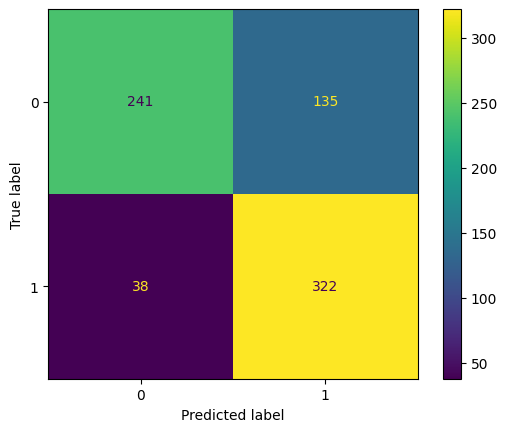

In [20]:
# Displaying the confusion matrix!
conf = metrics.confusion_matrix(y_train, X_train_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

## Check test data

In [21]:
# FE to the test data
X_test_fe = feature_engineering(X_test)

In [22]:
# Make our prediction
X_test_fe[['prob_points','prob_no_points']] = lr.predict_proba(X_test_fe)

In [23]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_no_points']>.5, 1, 0)

In [24]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for the Churning predictions is:
[[55 13]
 [29 87]] 

The accuracy of the Churning prediction model is: 0.7717391304347826
The recall of the Churning prediction model is: 0.75
The precision of the Churning prediction model is: 0.87
The F1-score of the Churning prediction model is: 0.8055555555555555
